In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
warne_id = 8166
murali_id = 49636

In [98]:
url = 'https://stats.espncricinfo.com/ci/engine/player/{}.html?class=1;home_or_away=1;home_or_away=2;home_or_away=3;result=1;result=2;result=4;template=results;type=allround'

In [99]:
def get_player_data(id):
    player_url = url.format(id)
    data = pd.read_html(player_url)[3]
    data = data.drop(columns=['Unnamed: 14', 'BBI', 'Ave Diff', 'HS', '100' ,'Ct', 'St', 'Span'])
    data = data.dropna(0)
    data = data.replace('-', '0')
    data.iloc[:, 1:] = data.iloc[:, 1:].astype(float)
    data['Mat'] = data['Mat'].astype(float).astype(int)
    data['Runs'] = data['Runs'].astype(float).astype(int)
    data['Wkts'] = data['Wkts'].astype(float).astype(int)
    data['5'] = data['5'].astype(float).astype(int)
    return data

In [100]:
warne_data = get_player_data(warne_id)
murali_data = get_player_data(murali_id)

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


In [101]:
warne_data

,Grouping,Mat,Runs,Bat Av,Wkts,Bowl Av,5
0,v Bangladesh,2,11,5.50,11,27.27,1
1,v England,36,946,22.00,195,23.25,11
2,v ICC World XI,1,12,6.00,6,11.83,0
3,v India,14,309,14.71,43,47.18,1
4,v New Zealand,20,558,32.82,103,24.37,3
...,...,...,...,...,...,...,...
119,6th match in series,2,86,21.50,9,26.33,0
121,Border-Gavaskar,12,281,15.61,42,42.88,1
122,Frank Worrell Trophy,19,384,13.71,65,29.95,3
123,The Ashes,36,946,22.00,195,23.25,11


In [102]:
murali_data

,Grouping,Mat,Runs,Bat Av,Wkts,Bowl Av,5
0,ICC World XI,1,2,1.00,5,31.40,0
1,Sri Lanka,132,1259,11.87,795,22.67,67
3,v Australia,13,104,9.45,59,36.06,5
4,v Bangladesh,11,40,8.00,89,13.37,11
5,v England,16,202,15.53,112,20.06,8
...,...,...,...,...,...,...,...
134,1st match in series,53,413,10.07,340,21.62,34
135,2nd match in series,50,620,13.47,282,24.17,21
136,3rd match in series,24,176,11.00,130,24.42,8
138,tournament finals,1,0,0.00,8,15.87,0


In [103]:
warne_country_wise_data =  warne_data[warne_data['Grouping'].str.contains('in')].iloc[:11]
warne_country_wise_data['Grouping'] = warne_country_wise_data['Grouping'].str.replace('in ', '')
warne_country_wise_data

,Grouping,Mat,Runs,Bat Av,Wkts,Bowl Av,5
11,Australia,69,1533,19.16,319,26.39,15
12,Bangladesh,2,11,5.50,11,27.27,1
13,England,22,563,21.65,129,21.94,8
14,India,9,193,12.86,34,43.11,1
15,New Zealand,9,138,17.25,49,21.30,1
16,Pakistan,3,69,17.25,18,28.00,2
17,South Africa,12,294,16.33,61,24.31,2
18,Sri Lanka,9,151,10.06,48,20.45,6
19,U.A.E.,2,30,15.00,16,9.62,1
20,West Indies,7,166,15.09,17,39.64,0


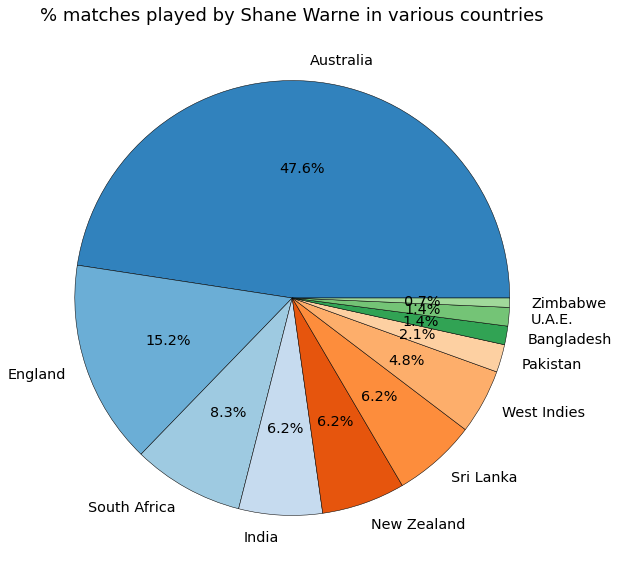

In [132]:
d = warne_country_wise_data.sort_values('Mat', ascending=False)
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor('white')
cmap = plt.get_cmap("tab20c")
ax.pie(d['Mat'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
        textprops={'size': 'x-large'}, colors=cmap([i for i in range(12)]))
ax.set_title('% matches played by Shane Warne in various countries', fontsize=18)
plt.show()

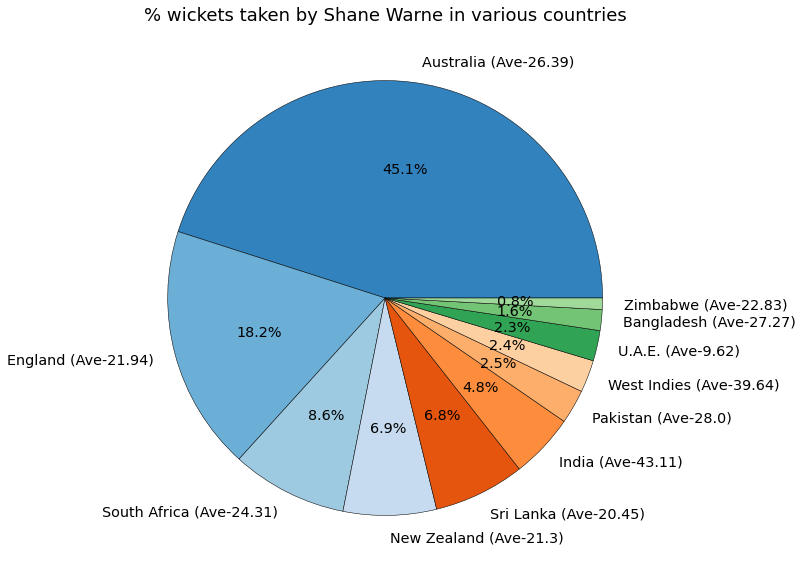

In [137]:
d = warne_country_wise_data.sort_values('Wkts', ascending=False)
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor('white')
cmap = plt.get_cmap("tab20c")
ax.pie(d['Wkts'], labels=d['Grouping'] + ' (Ave-' + d['Bowl Av'].astype(str) + ')', autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
        textprops={'size': 'x-large'}, colors=cmap([i for i in range(12)]))
ax.set_title('% wickets taken by Shane Warne in various countries', fontsize=18)
plt.show()

In [146]:
warne_continent_wise_data =  warne_data[warne_data['Grouping'].str.contains('in')].iloc[11:16]
warne_continent_wise_data['Grouping'] = warne_continent_wise_data['Grouping'].str.replace('in ', '')
warne_continent_wise_data

,Grouping,Mat,Runs,Bat Av,Wkts,Bowl Av,5
23,Africa,13,300,15.78,67,24.17,2
24,Americas,7,166,15.09,17,39.64,0
25,Asia,25,454,11.94,127,26.81,11
26,Europe,22,563,21.65,129,21.94,8
27,Oceania,78,1671,18.98,368,25.71,16


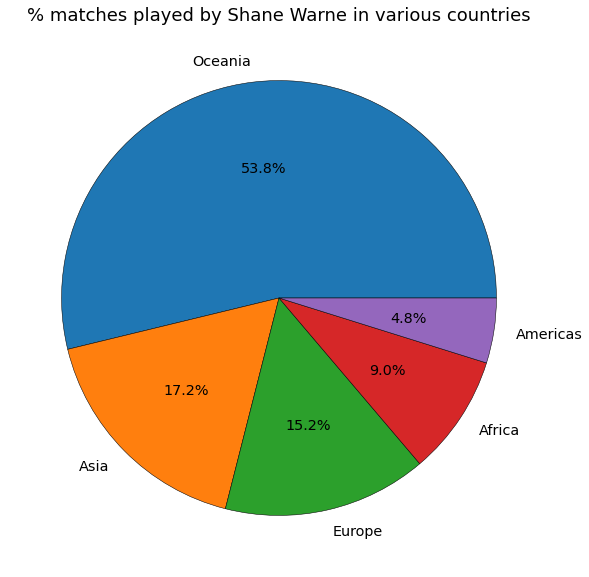

In [147]:
d = warne_continent_wise_data.sort_values('Mat', ascending=False)
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor('white')
cmap = plt.get_cmap("tab20c")
ax.pie(d['Mat'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
        textprops={'size': 'x-large'})
ax.set_title('% matches played by Shane Warne in various continents', fontsize=18)
plt.show()

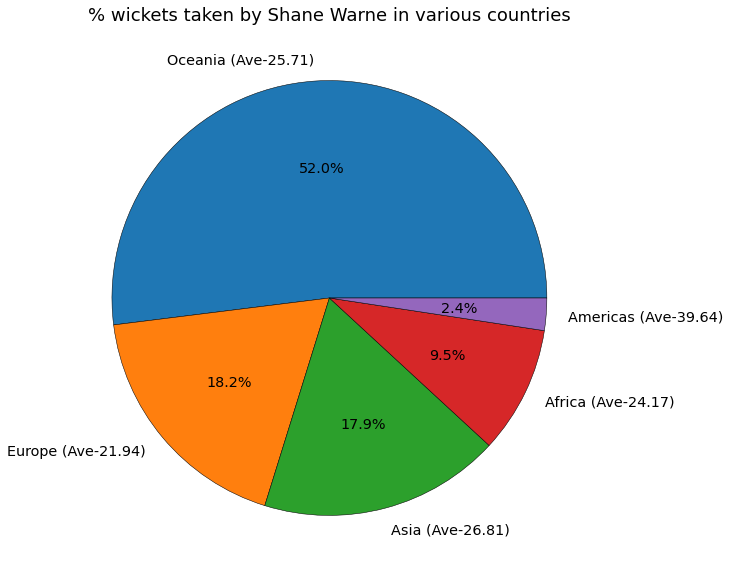

In [153]:
d = warne_continent_wise_data.sort_values('Wkts', ascending=False)
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor('white')
cmap = plt.get_cmap("tab20c")
ax.pie(d['Wkts'], labels=d['Grouping'] + ' (Ave-' + d['Bowl Av'].astype(str) + ')', autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
        textprops={'size': 'x-large'})
ax.set_title('% wickets taken by Shane Warne in various continents', fontsize=18)
plt.show()

In [141]:
murali_country_wise_data =  murali_data[murali_data['Grouping'].str.contains('in')].iloc[:10]
murali_country_wise_data

,Grouping,Mat,Runs,Bat Av,Wkts,Bowl Av,5
13,in Australia,5,42,7.00,12,75.41,0
14,in Bangladesh,4,13,6.50,29,19.44,3
15,in England,6,73,12.16,48,19.20,5
16,in India,11,126,12.60,40,45.45,2
17,in New Zealand,6,93,8.45,30,19.96,2
18,in Pakistan,9,102,12.75,50,24.96,2
19,in South Africa,6,89,11.12,35,26.02,3
20,in Sri Lanka,73,624,14.18,493,19.56,45
21,in West Indies,6,42,5.25,37,23.00,4
22,in Zimbabwe,7,57,11.40,26,27.53,1


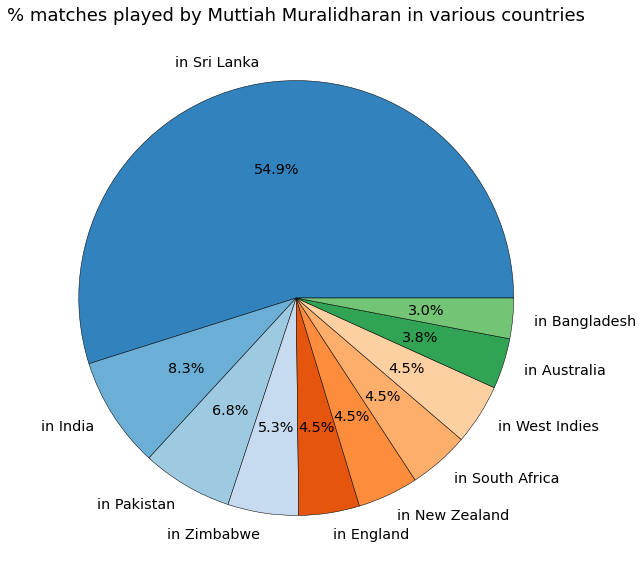

In [142]:
d = murali_country_wise_data.sort_values('Mat', ascending=False)
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor('white')
cmap = plt.get_cmap("tab20c")
ax.pie(d['Mat'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
        textprops={'size': 'x-large'}, colors=cmap([i for i in range(12)]))
ax.set_title('% matches played by Muttiah Muralidharan in various countries', fontsize=18)
plt.show()

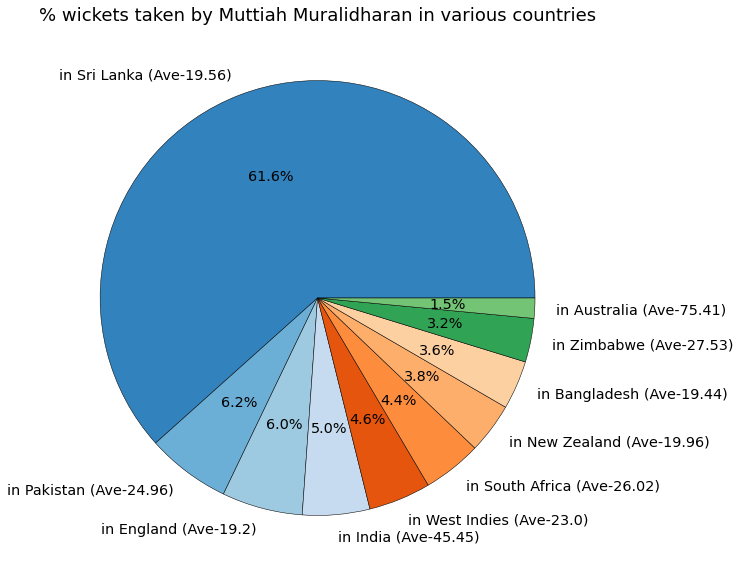

In [143]:
d = murali_country_wise_data.sort_values('Wkts', ascending=False)
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor('white')
cmap = plt.get_cmap("tab20c")
ax.pie(d['Wkts'], labels=d['Grouping'] + ' (Ave-' + d['Bowl Av'].astype(str) + ')', autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
        textprops={'size': 'x-large'}, colors=cmap([i for i in range(12)]))
ax.set_title('% wickets taken by Muttiah Muralidharan in various countries', fontsize=18)
plt.show()

In [149]:
murali_continent_wise_data =  murali_data[murali_data['Grouping'].str.contains('in')].iloc[10:15]
murali_continent_wise_data['Grouping'] = murali_continent_wise_data['Grouping'].str.replace('in ', '')
murali_continent_wise_data

,Grouping,Mat,Runs,Bat Av,Wkts,Bowl Av,5
24,Africa,13,146,11.23,61,26.67,4
25,Americas,6,42,5.25,37,23.00,4
26,Asia,97,865,13.51,612,21.69,52
27,Europe,6,73,12.16,48,19.20,5
28,Oceania,11,135,7.94,42,35.80,2


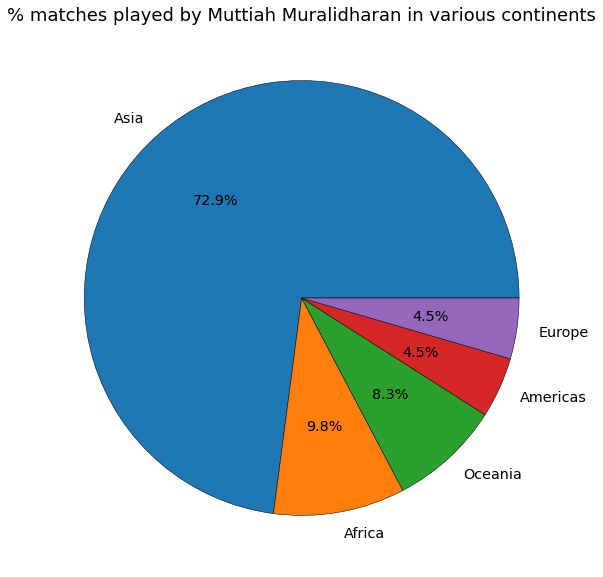

In [151]:
d = murali_continent_wise_data.sort_values('Mat', ascending=False)
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor('white')
cmap = plt.get_cmap("tab20c")
ax.pie(d['Mat'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
        textprops={'size': 'x-large'})
ax.set_title('% matches played by Muttiah Muralidharan in various continents', fontsize=18)
plt.show()

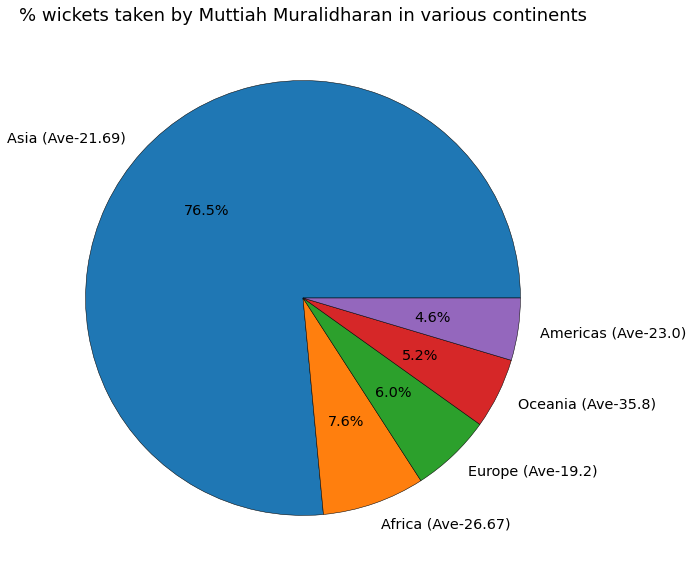

In [154]:
d = murali_continent_wise_data.sort_values('Wkts', ascending=False)
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor('white')
cmap = plt.get_cmap("tab20c")
ax.pie(d['Wkts'], labels=d['Grouping'] + ' (Ave-' + d['Bowl Av'].astype(str) + ')', autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
        textprops={'size': 'x-large'})
ax.set_title('% wickets taken by Muttiah Muralidharan in various continents', fontsize=18)
plt.show()